<a href="https://colab.research.google.com/github/chilin2tb-stack/plot_plate_boundary_pygmt/blob/main/pygmt_plot_plate_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyGMT 0.17 no Google Colab

> ⚠️ **Nota:** Há uma incompatibilidade temporária no sistema de resolução do conda/mamba no Colab (a versão do Python em uso é **3.12.11**, mas o solver pode conter um *pin* interno diferente).  
> Por isso, para instalar o PyGMT é necessário usar uma versão compatível do **condacolab** (ou ajustar o arquivo `pinned` do conda para **python=3.12**).  
> Depois disso, o **PyGMT 0.17** instala e executa normalmente. Isso será corrigido em uma atualização futura do Colab.


In [1]:
!pip install condacolab --quiet
# need to install condacolab for a python 3.11 pin
import condacolab
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


**Don't PANIC !** The kernel will restart automatically.

After that, install `pygmt` normally.

In [1]:
!mamba install pygmt --quiet # <--- it takes around 1 minute

warning  libmamba [numpy-2.3.5-py312h33ff503_0] The following files were already present in the environment:
    - bin/f2py
    - bin/numpy-config


In [2]:
!mamba install obspy --quiet

warning  libmamba [fonttools-4.60.1-py312h8a5da7c_0] The following files were already present in the environment:
    - bin/fonttools
    - bin/pyftmerge
    - bin/pyftsubset
    - bin/ttx
    - share/man/man1/ttx.1


In [3]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.17.0
System information:
  python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.6.105+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.5
  pandas: 2.2.2
  xarray: 2025.11.0
  packaging: 25.0
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.11.0
  ghostscript: 10.06.0
GMT library information:
  version: 6.5.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.5.0


gmtread [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
gmtread [NOTICE]: SRTM15 Earth Relief v2.7 at 1x1 arc degrees reduced by Gaussian Cartesian filtering (314.5 km fullwidth) [Tozer et al., 2019].
gmtread [NOTICE]:   -> Download grid file [111K]: earth_relief_01d_p.grd


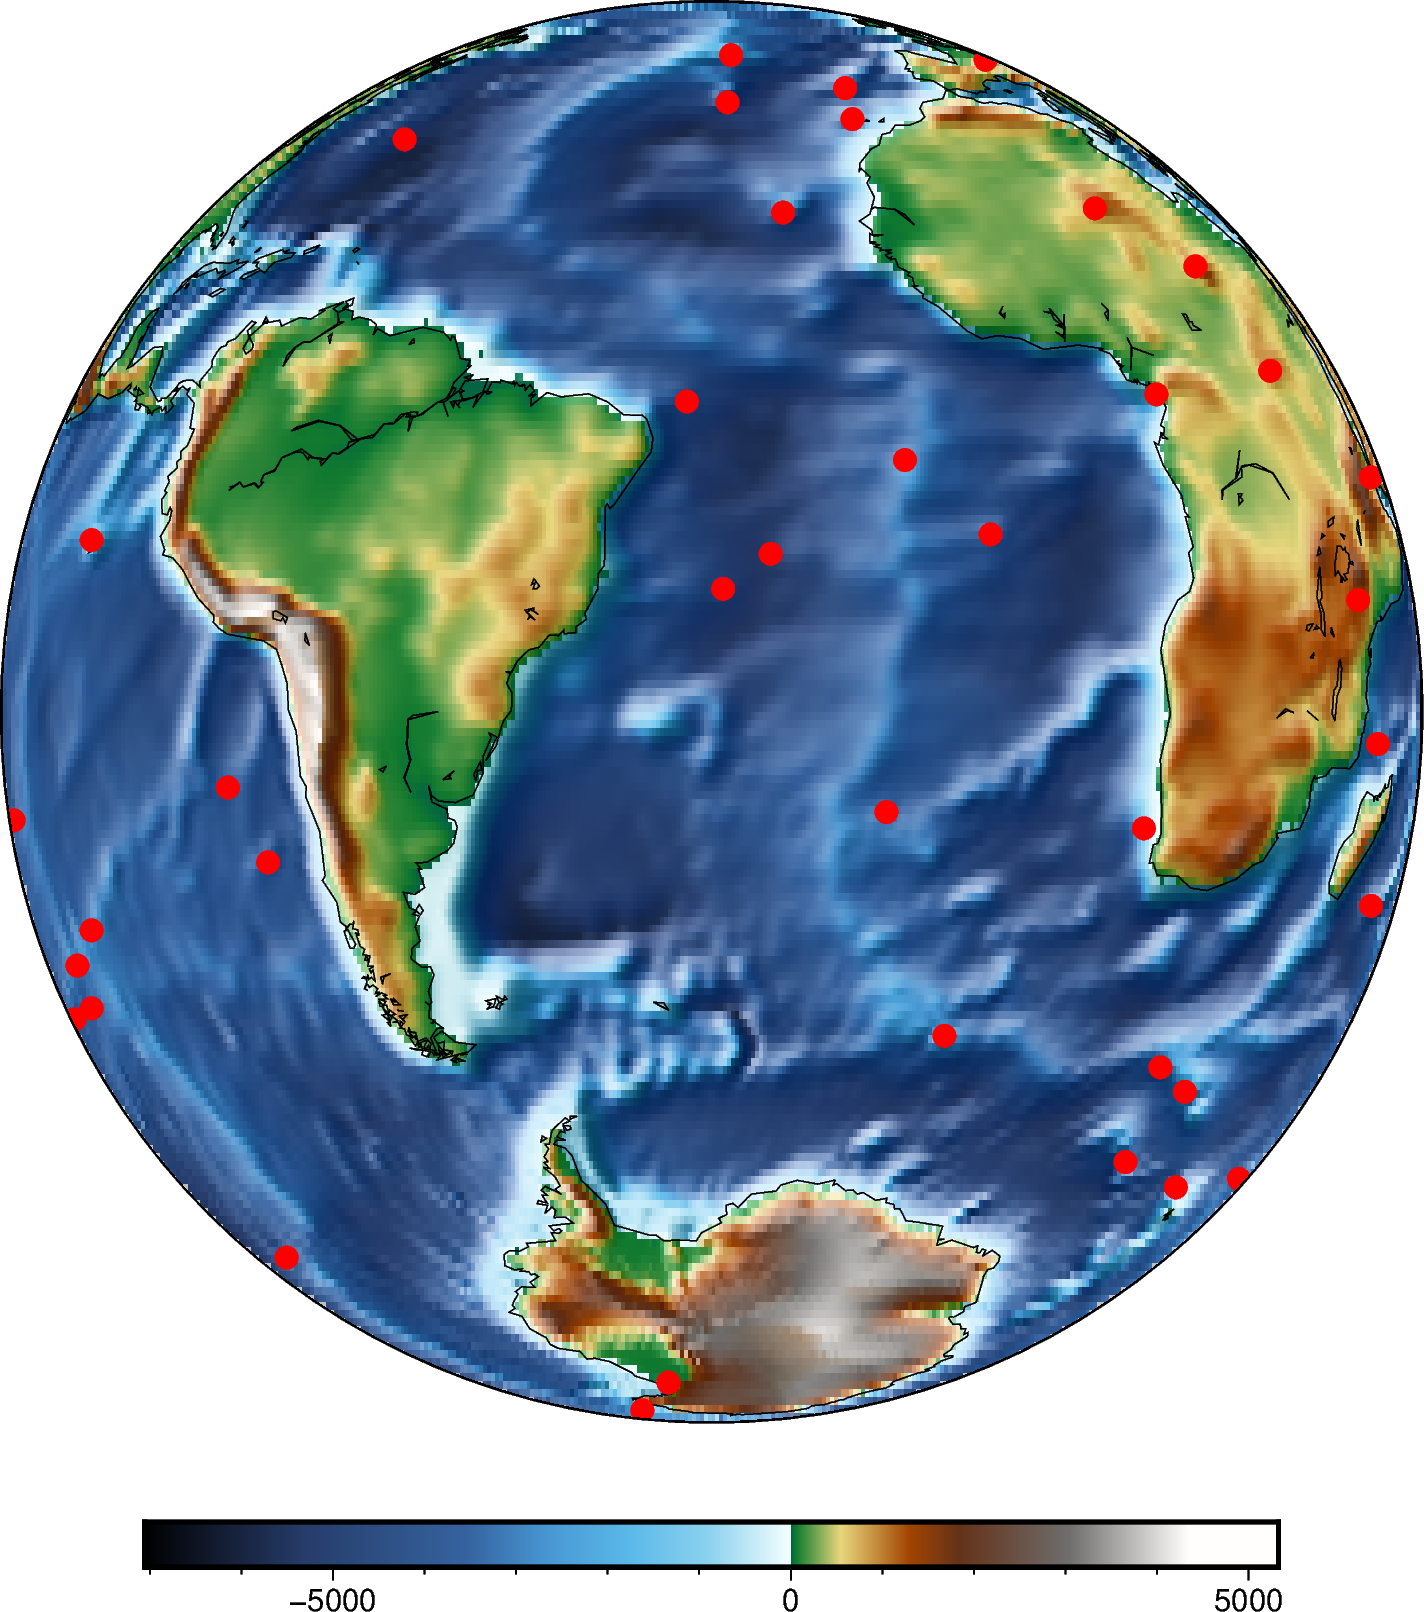

In [4]:
# Just an example
from pygmt.datasets import load_earth_relief #<-- Use global relief for topography

grid = load_earth_relief(resolution='01d', registration='pixel')

fig = pygmt.Figure()
fig.basemap(region='g', projection='G330/-30/12c', frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
fig.coast(resolution='c', shorelines=True, area_thresh=1000)
fig.plot(data='@hotspots.txt', style='c0.2c', fill='red')
fig.colorbar()
fig.show()

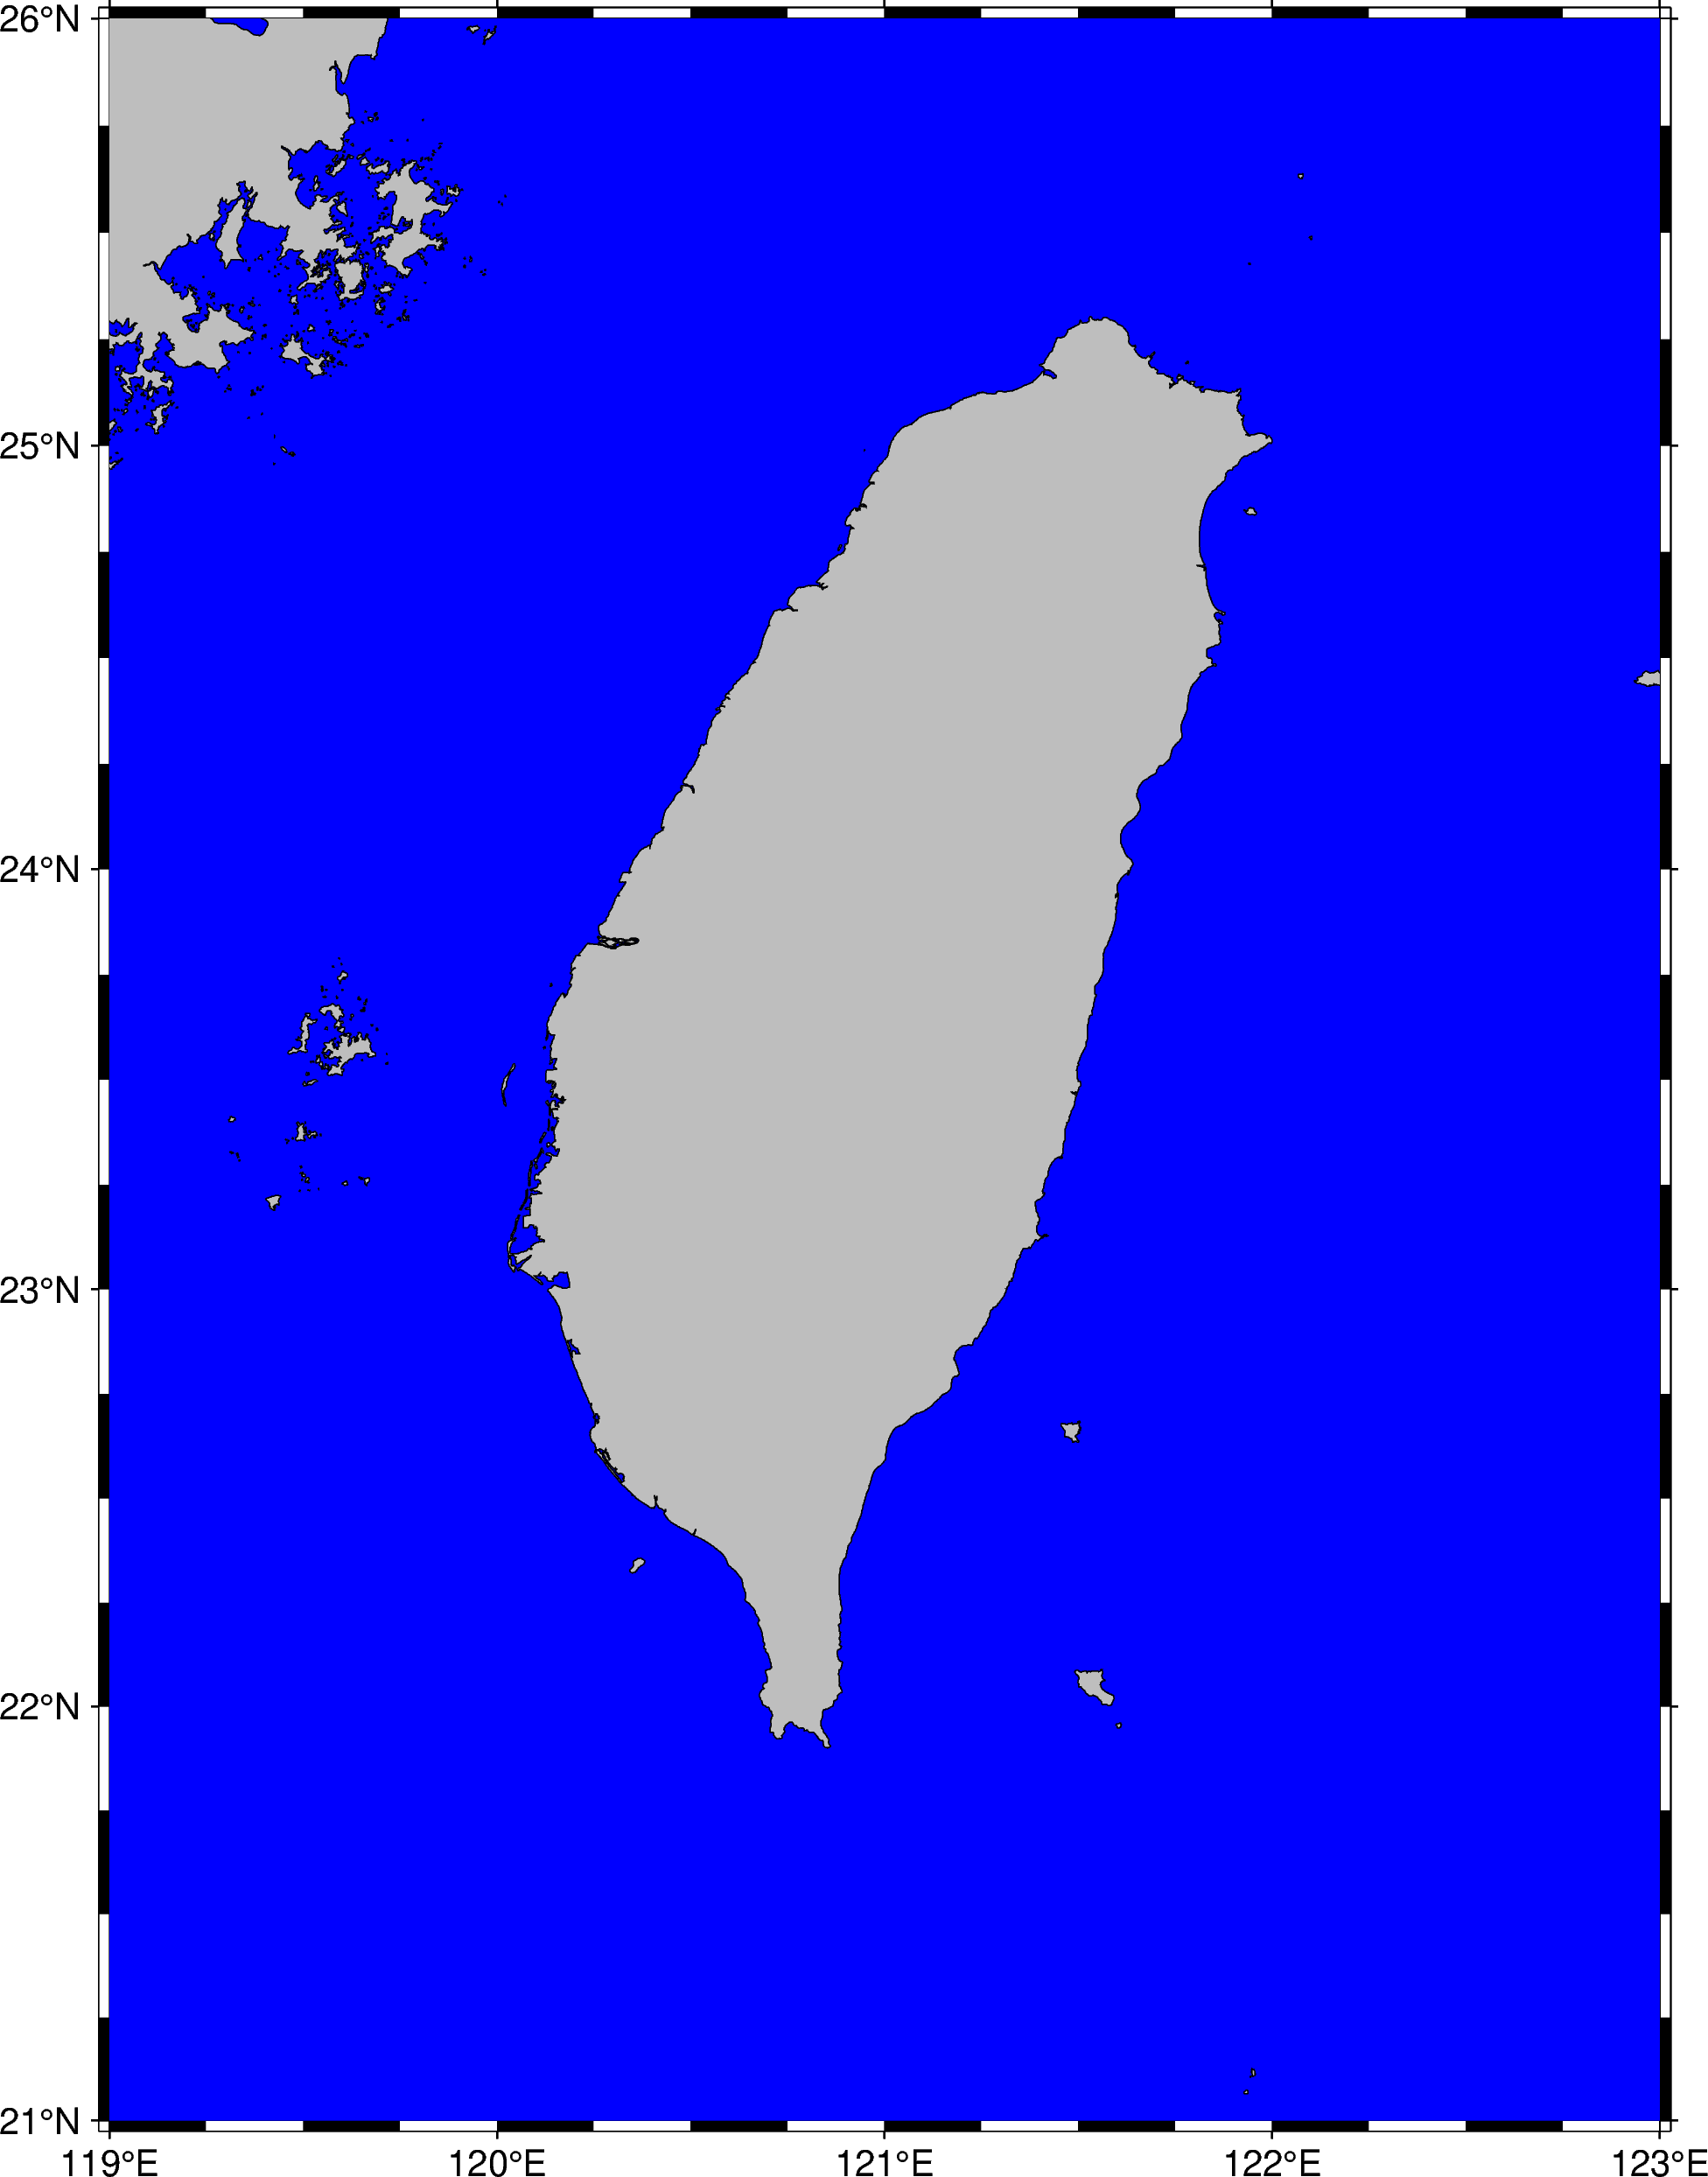

In [5]:
fig = pygmt.Figure()
fig.basemap(region="119/123/21/26", projection="M15c", frame=True)
fig.coast(shorelines=True, land="gray", water="blue", resolution="full")
fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.7 at 05x05 arc minutes reduced by Gaussian Cartesian filtering (26.2 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 180x180 degree grid tile (earth_relief_05m_p): S90E000


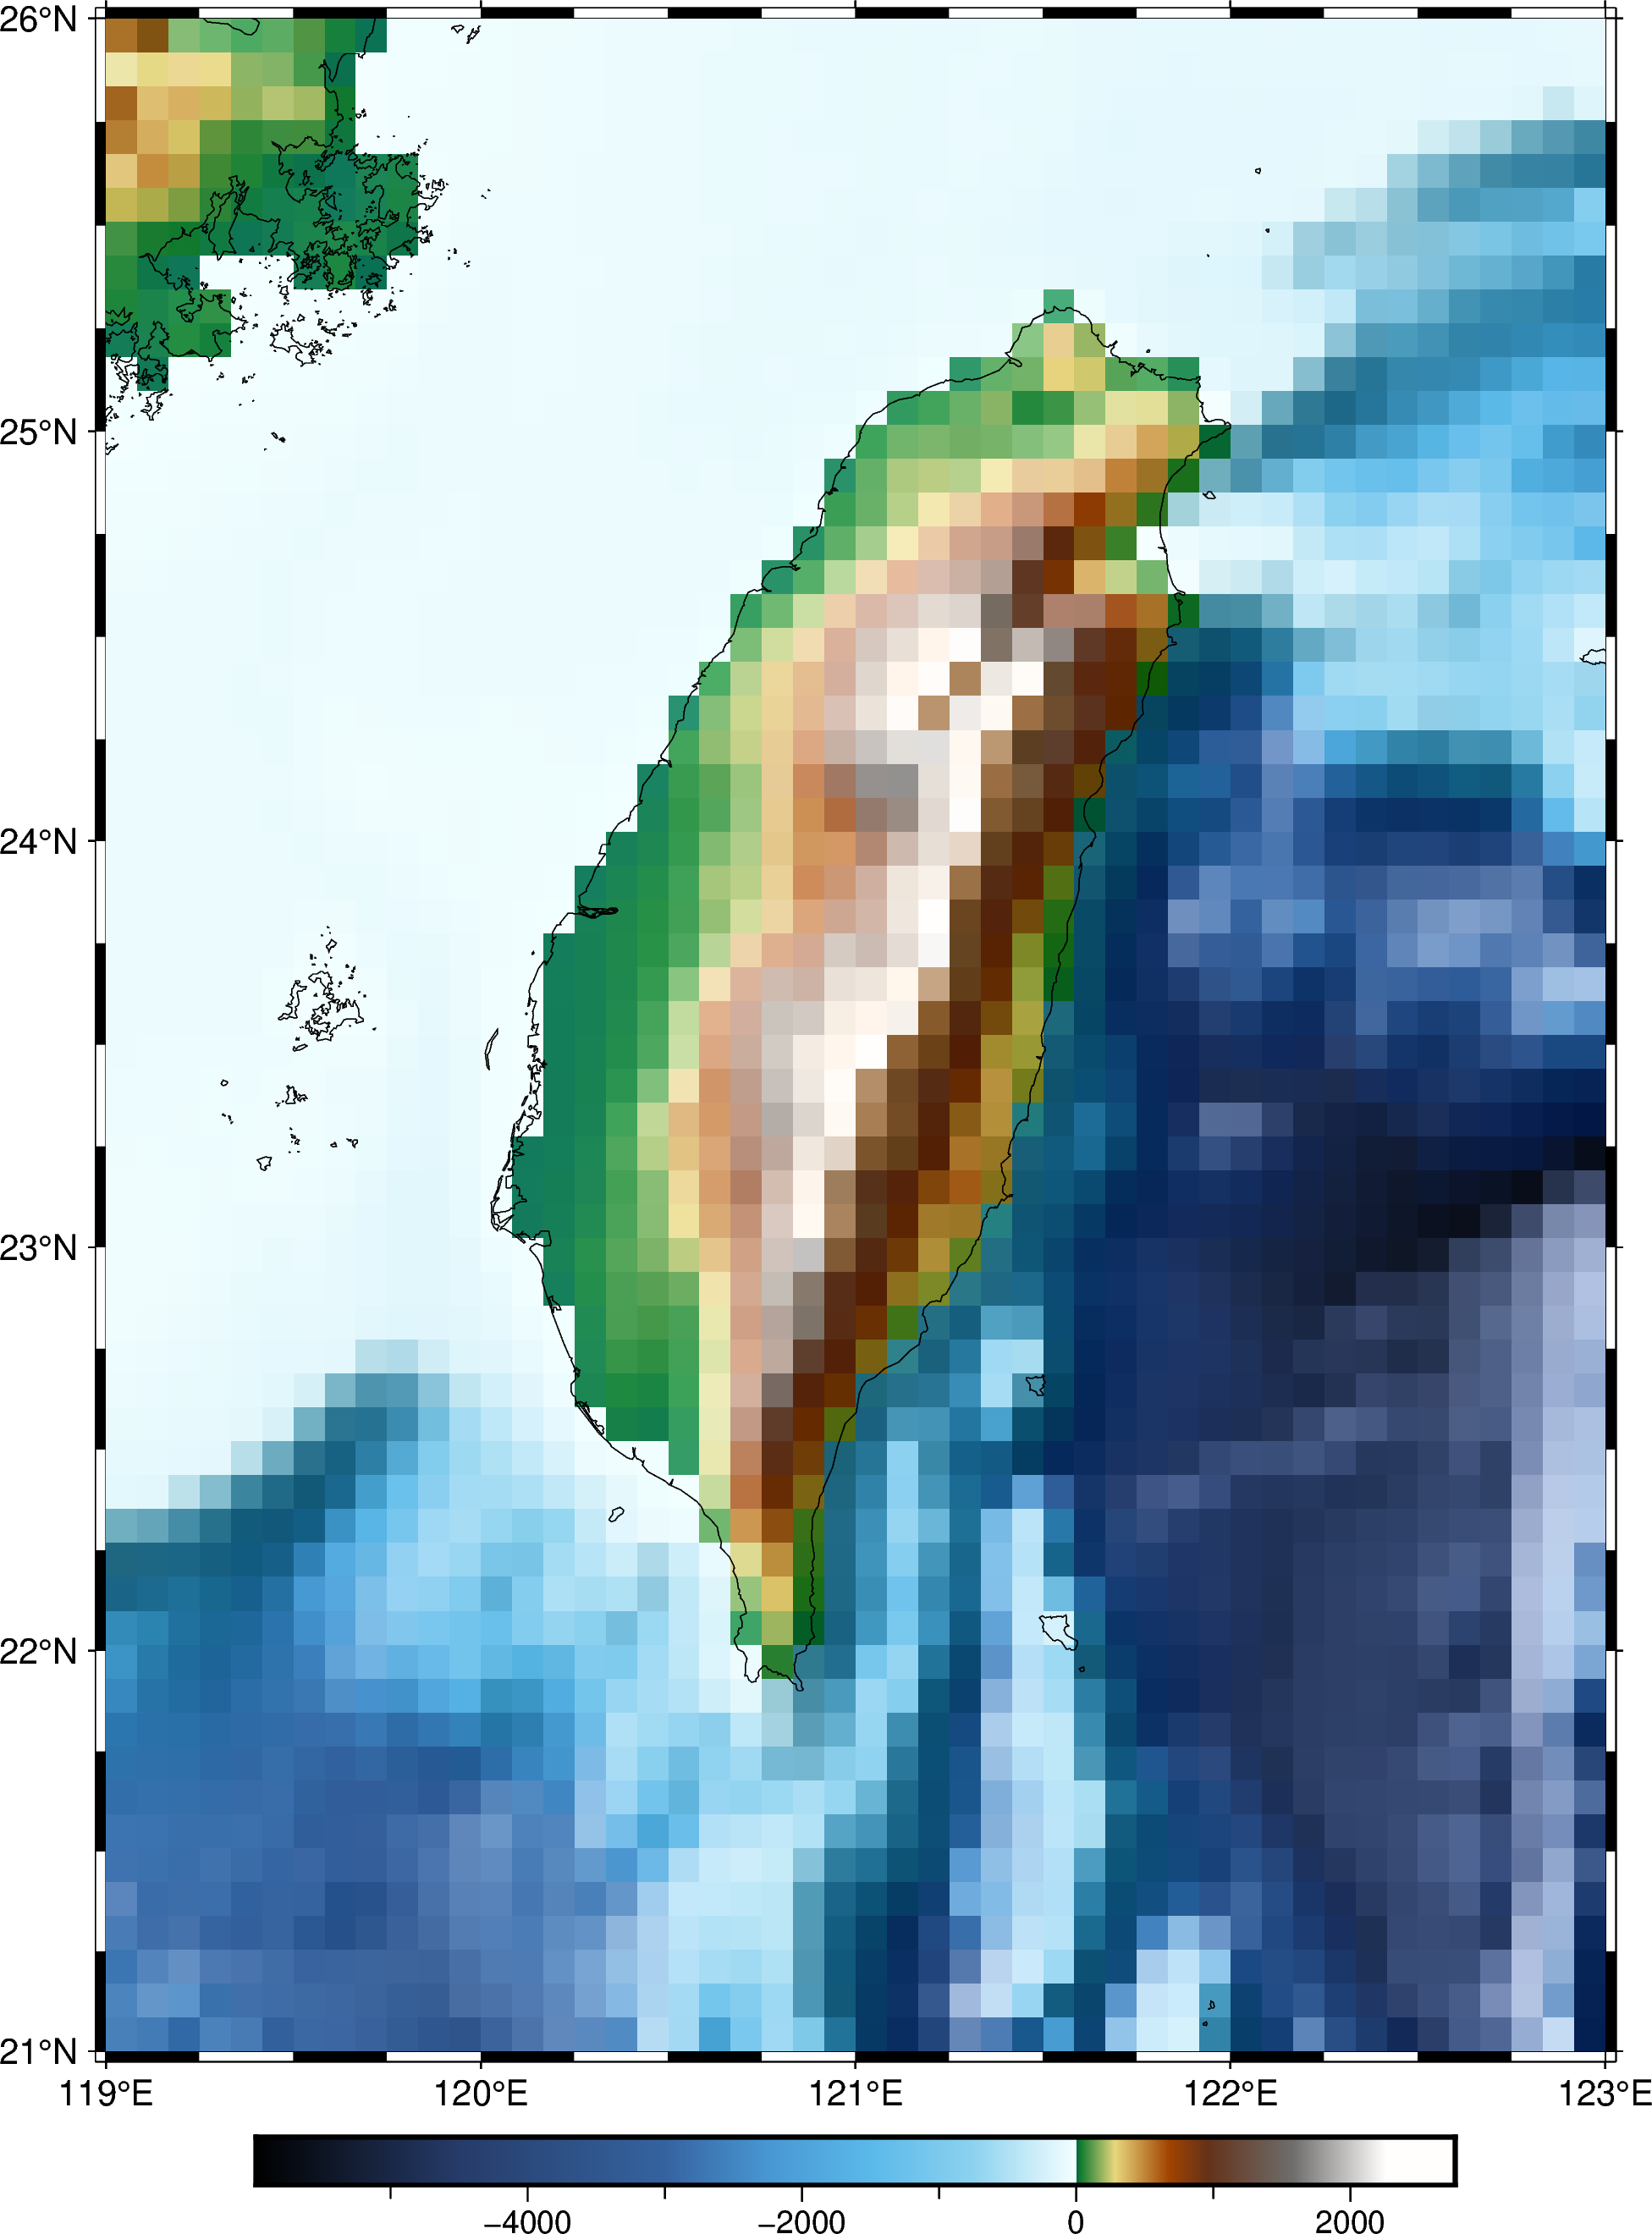

In [6]:
# Plot Taiwan with Earth relief data
from pygmt.datasets import load_earth_relief

# Load earth relief data for the region of Taiwan
# The 'region' parameter in basemap will effectively crop this global grid
grid = load_earth_relief(resolution='05m', region="119/123/21/26", registration='pixel')

fig = pygmt.Figure()
# Set region for Taiwan (longitude: 119-123, latitude: 21-26)
# Use Mercator projection ('M') for a regional view
fig.basemap(region="119/123/21/26", projection="M15c", frame=True)
fig.grdimage(grid, cmap='geo', shading=True)
# Use 'h' (high) resolution for better detail for Taiwan's coastlines
fig.coast(resolution='h', shorelines=True)
# Remove the global hotspots plot, as it's not specific to Taiwan in this context
# fig.plot(data='@hotspots.txt', style='c0.2c', fill='red') # Uncomment if you want to include global hotspots
fig.colorbar()
fig.show()

In [40]:
pip install pygmt pandas

plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 3 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 5 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 7 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 9 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 11 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 13 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 15 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 17 in file PB2002_boundaries.json
plot [WARNING]: Mismatch between actual (0) and expected (2) fields near line 19 in file PB2002_boundaries.j

板塊邊界繪製成功！


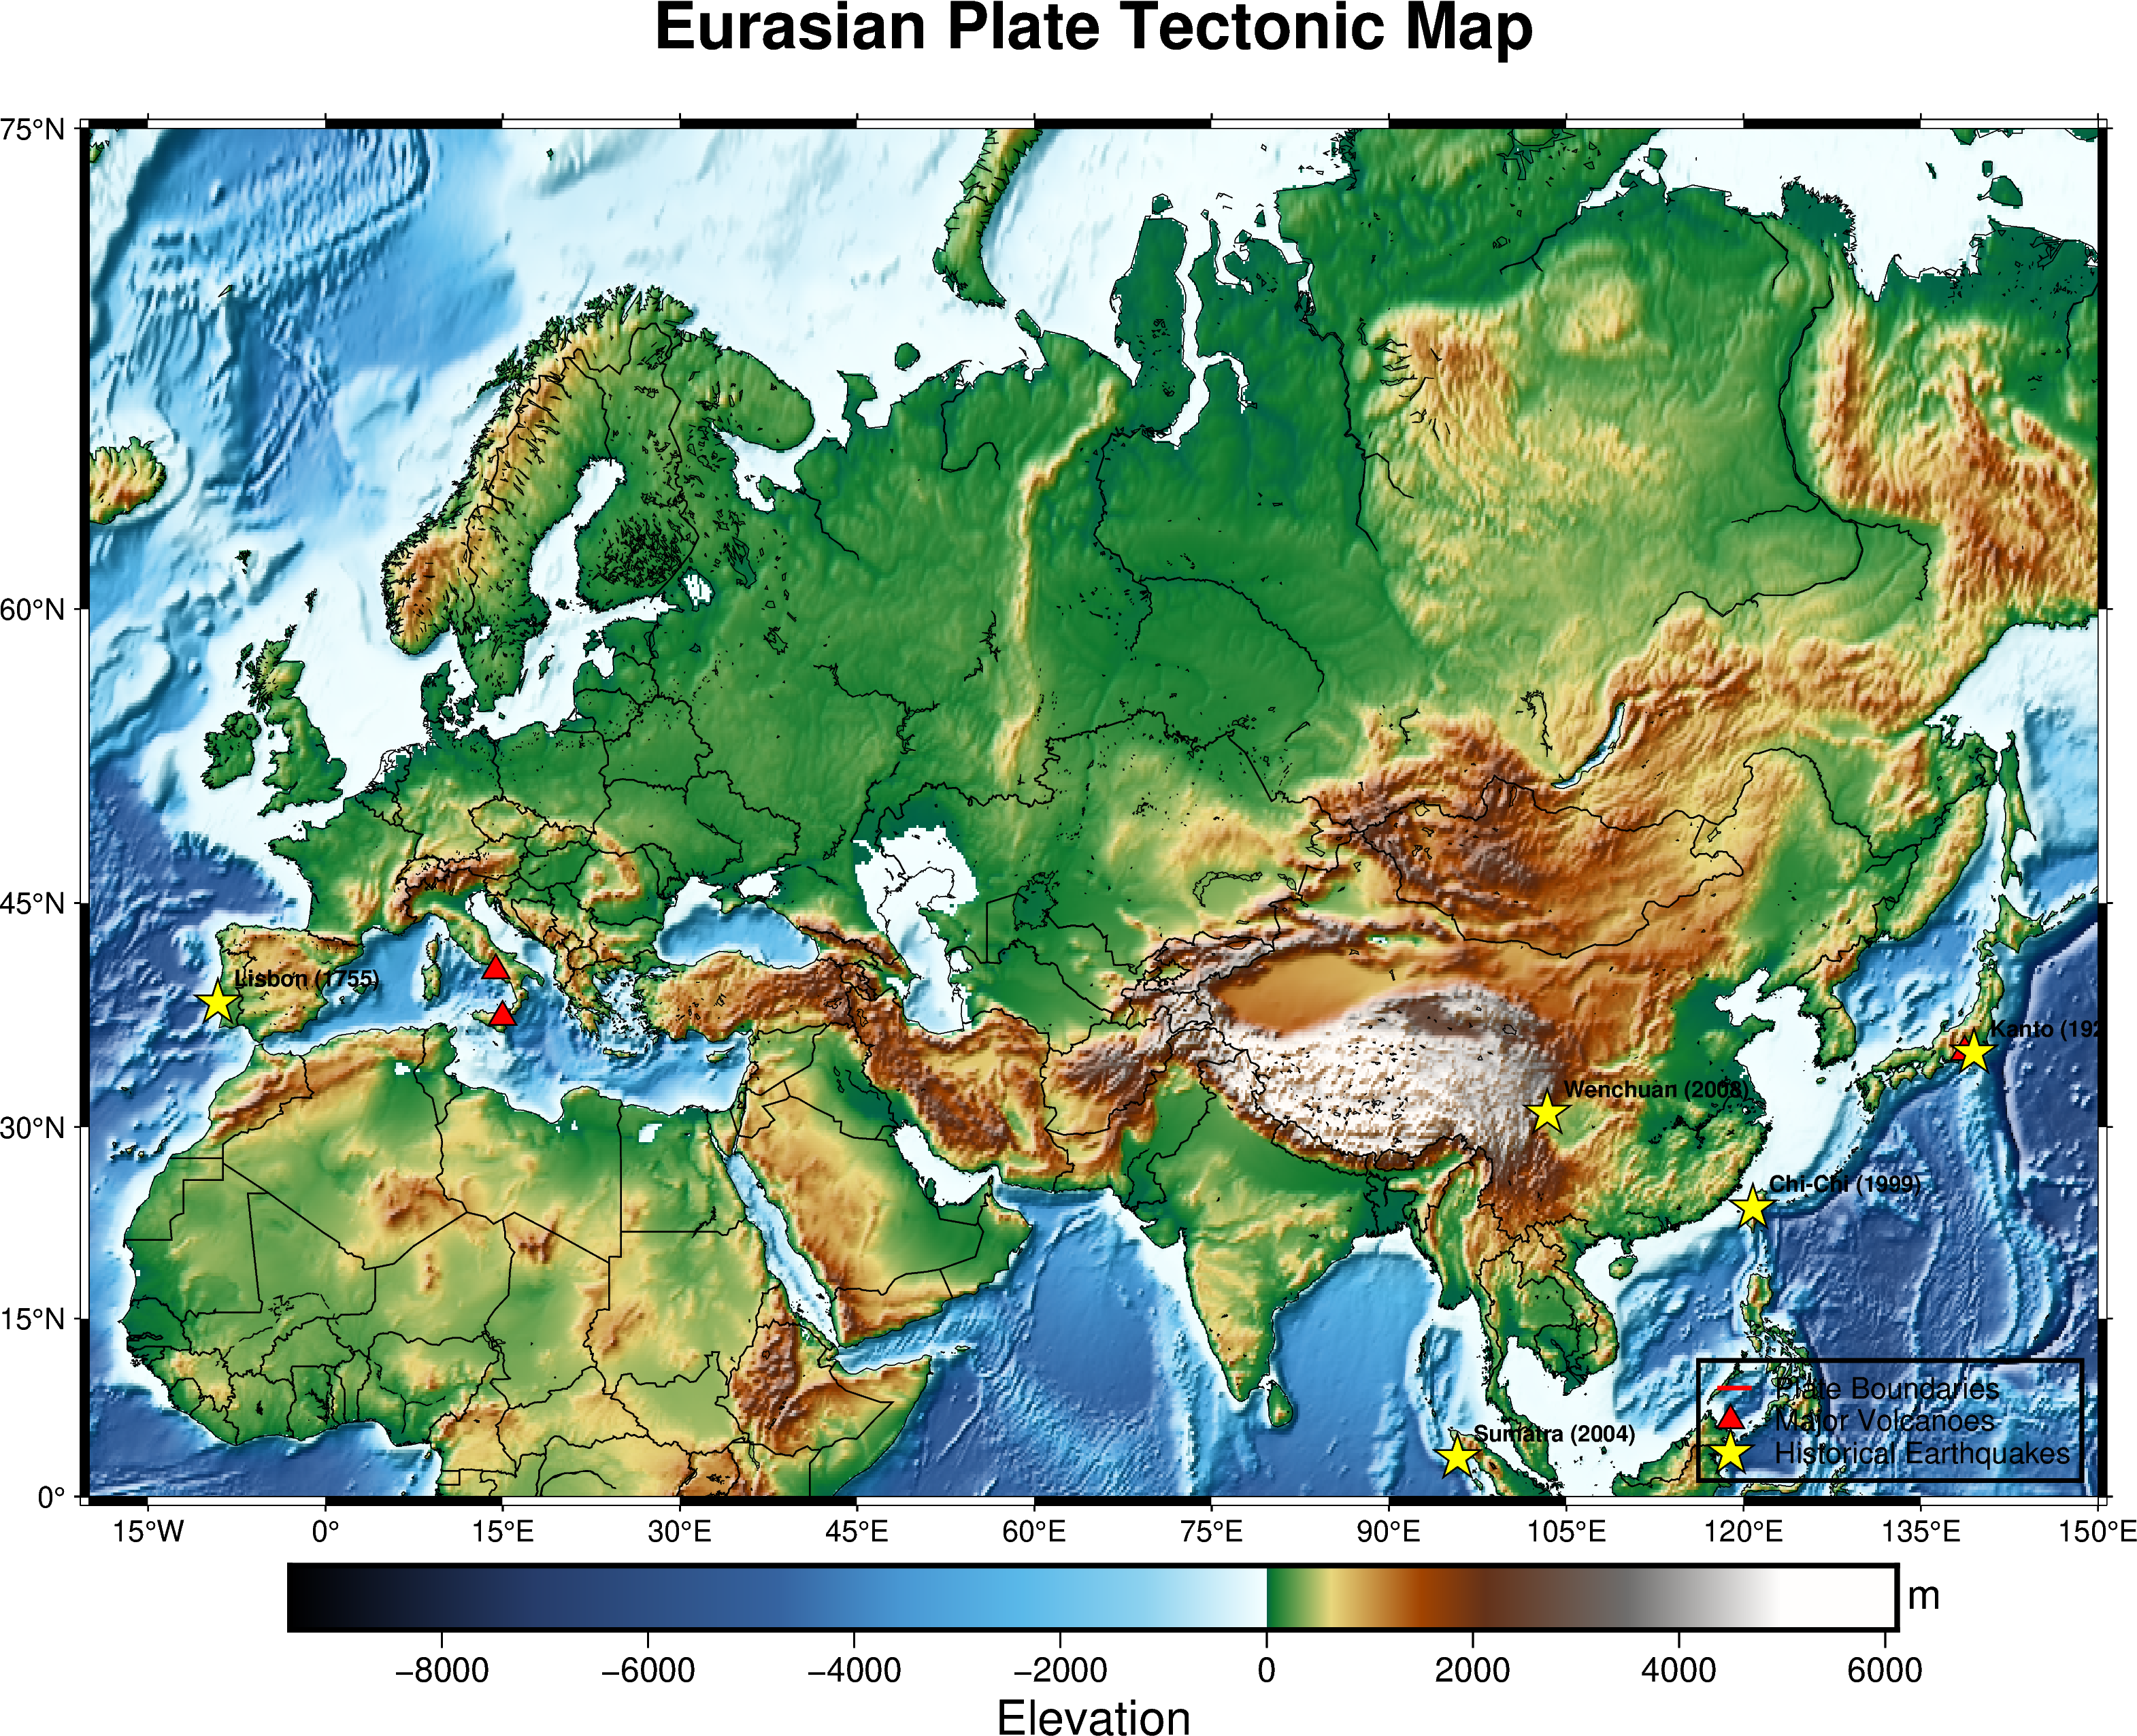

In [42]:
import pygmt
import pandas as pd

# 1. 準備資料
# --------------------------------------------------------
# (A) 歷史著名地震
quakes_data = {
    "longitude": [-9.1, 103.4, 120.8, 139.5, 95.8],
    "latitude": [38.7, 31.0, 23.85, 35.3, 3.3],
    "magnitude": [8.5, 7.9, 7.6, 7.9, 9.1],
    "label": ["Lisbon (1755)", "Wenchuan (2008)", "Chi-Chi (1999)", "Kanto (1923)", "Sumatra (2004)"]
}
df_quakes = pd.DataFrame(quakes_data)

# (B) 著名火山
volcano_data = {
    "longitude": [138.72, 14.99, 14.42, 105.42],
    "latitude": [35.36, 37.75, 40.82, -6.10],
    "name": ["Mt. Fuji", "Mt. Etna", "Mt. Vesuvius", "Krakatoa"]
}
df_volcano = pd.DataFrame(volcano_data)

# 2. 設定繪圖參數
# --------------------------------------------------------
region = [-20, 150, 0, 75]
projection = "M25c"

fig = pygmt.Figure()

# 3. 繪製底圖與地形
# --------------------------------------------------------
# 你的 @earth_relief_10m 下載是成功的，所以維持原樣
fig.grdimage(
    grid="@earth_relief_10m",
    region=region,
    projection=projection,
    cmap="geo",
    shading=True,
    frame=["a", "+tEurasian Plate Tectonic Map"]
)

fig.coast(shorelines=True, borders=["1/0.5p,black"])

# 4. [修復重點] 繪製板塊邊界
# --------------------------------------------------------
# 改用 GitHub 上的 GeoJSON 檔案，並加入除錯機制
plate_url = "https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json"

try:
    fig.plot(
        data=plate_url,
        pen="1.5p,red,-",
        label="Plate Boundaries"
    )
    print("板塊邊界繪製成功！")
except Exception as e:
    print(f"警告：板塊邊界下載失敗，程式將繼續執行繪製其餘部分。錯誤訊息: {e}")

# 5. 繪製著名火山
# --------------------------------------------------------
fig.plot(
    data=df_volcano,
    style="t0.4c",
    fill="red",
    pen="0.5p,black",
    label="Major Volcanoes"
)

# 6. 繪製歷史著名地震
# --------------------------------------------------------
fig.plot(
    x=df_quakes.longitude,
    y=df_quakes.latitude,
    style="a0.6c",
    fill="yellow",
    pen="0.5p,black",
    label="Historical Earthquakes"
)

fig.text(
    x=df_quakes.longitude,
    y=df_quakes.latitude,
    text=df_quakes.label,
    font="8p,Helvetica-Bold,black",
    justify="LB",
    offset="0.2c/0.2c"
)

# 7. 添加圖例與色標
# --------------------------------------------------------
fig.colorbar(frame=["a2000", "x+lElevation", "y+lm"])
fig.legend(position="JBR+jBR+o0.2c", box=True)

# 8. 顯示與儲存
# --------------------------------------------------------
fig.savefig("eurasia_plate_map_fixed.png")
fig.show()